In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp, ttest_ind, wilcoxon, shapiro, mannwhitneyu,levene, chi2_contingency, kurtosis, skew
from statsmodels.stats.power import ttest_power
import scipy.stats as stats

Question 1:
A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data (Wholesale Customer.csv) consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel/Restaurant/Café HoReCa, Retail).

1.1. Use methods of descriptive statistics to summarize data. Which Region and which Channel seems to spend more? Which Region and which Channel seems to spend less?

In [57]:
data = pd.read_csv('Wholesale Customer.csv')
data.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
Buyer/Spender       440 non-null int64
Channel             440 non-null object
Region              440 non-null object
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicatessen        440 non-null int64
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [59]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,220.500000,127.161315,1.0,110.75,220.5,330.25,440.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [60]:
data.describe(include='all')

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440,440,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
unique,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Hotel,Other,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,298,316,NaN,NaN,NaN,NaN,NaN,NaN
mean,220.500000,NaN,NaN,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,NaN,NaN,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,NaN,NaN,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,NaN,NaN,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,NaN,NaN,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,NaN,NaN,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000


In [61]:
data['Region'].value_counts()  # to check number of regions in data

Other     316
Lisbon     77
Oporto     47
Name: Region, dtype: int64

In [62]:
data['Channel'].value_counts()  # to check number of regions in data

Hotel     298
Retail    142
Name: Channel, dtype: int64

In [63]:
data.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [64]:
del(data['Buyer/Spender']) #cleaning data

In [65]:
data['total'] = data['Fresh'] + data['Milk'] + data['Grocery'] + data['Frozen'] + data['Detergents_Paper'] + data['Delicatessen']
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,total
0,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,Retail,Other,22615,5410,7198,3915,1777,5185,46100


In [66]:
Channel_total = data.groupby('Channel')['total'].sum()
Channel_total

Channel
Hotel     7999569
Retail    6619931
Name: total, dtype: int64

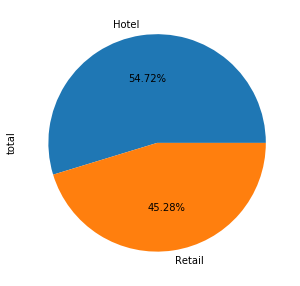

In [67]:
Channel_total.plot(kind='pie', autopct = '%1.2f%%'); #visualising with pie chart

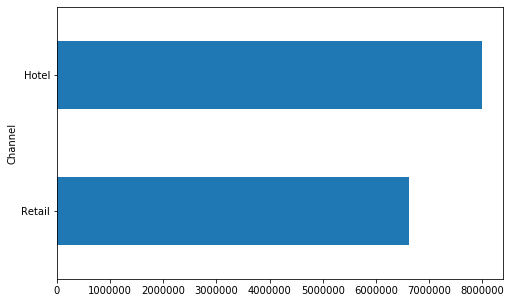

In [68]:
Channel_total.sort_values().plot.barh();

In [69]:
Min_C = Channel_total.min()
print('Minimum spending in Channel is by Retail' , Min_C)

Minimum spending in Channel is by Retail 6619931


In [70]:
Max_C = Channel_total.max()
print('Maximum spending in Channel is by Hotel', Max_C)

Maximum spending in Channel is by Hotel 7999569


In [71]:
Region_total = data.groupby('Region')['total'].sum()
Region_total

Region
Lisbon     2386813
Oporto     1555088
Other     10677599
Name: total, dtype: int64

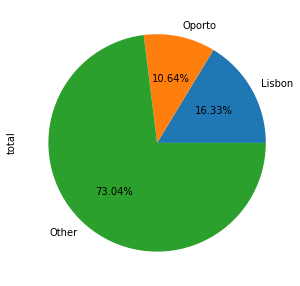

In [72]:
Region_total.plot(kind='pie', autopct = '%1.2f%%'); #visualising with pie chart

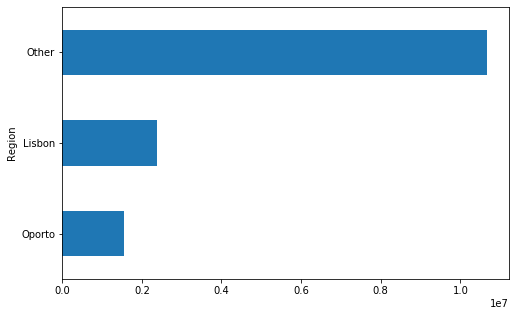

In [73]:
Region_total.sort_values().plot.barh(y='spending');

In [74]:
Min_R = Region_total.min()
print('Minimum spending in Region is by Oporto' , Min_R)

Minimum spending in Region is by Oporto 1555088


In [75]:
Max_R = Region_total.max()
print('Minimum spending in Region is by Other' , Min_R)

Minimum spending in Region is by Other 1555088


In [76]:
# Additional Information, if we want Region as main group and subgroup as Channel and want to identify spendings based on it.

In [77]:
CR_group = data.groupby(['Region','Channel']) 

In [78]:
RC_ts = CR_group.sum()['total']
RC_ts

Region  Channel
Lisbon  Hotel      1538342
        Retail      848471
Oporto  Hotel       719150
        Retail      835938
Other   Hotel      5742077
        Retail     4935522
Name: total, dtype: int64

In [79]:
RC_ts[RC_ts==RC_ts.min()]

Region  Channel
Oporto  Hotel      719150
Name: total, dtype: int64

In [80]:
RC_ts[RC_ts==RC_ts.max()]

Region  Channel
Other   Hotel      5742077
Name: total, dtype: int64

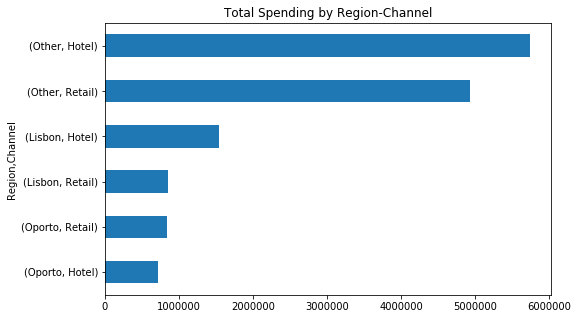

In [81]:
plt.rcParams['figure.figsize']= (8,5)
RC_ts.sort_values().plot.barh()
plt.title('Total Spending by Region-Channel')
plt.show()

1.2. There are 6 different varieties of items are considered.
Do all varieties show similar behaviour across Region and Channel?

In [82]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,total
0,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,Retail,Other,22615,5410,7198,3915,1777,5185,46100


In [83]:
del(data['total'])

In [84]:
data.groupby('Channel').sum()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,,,,,,
Hotel,4015717,1028614,1180717,1116979,235587,421955
Retail,1264414,1521743,2317845,234671,1032270,248988


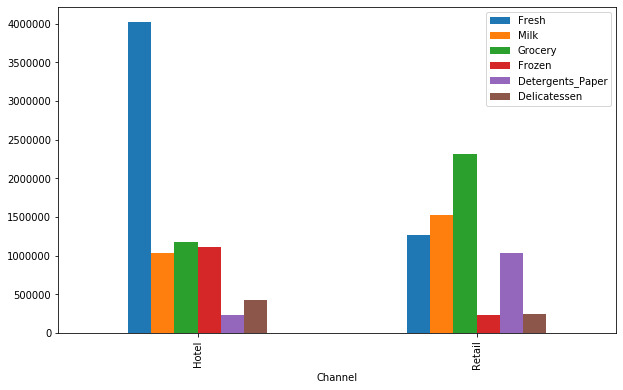

In [85]:
plt.rcParams['figure.figsize']= (10,6)
data.groupby('Channel').sum().plot.bar();

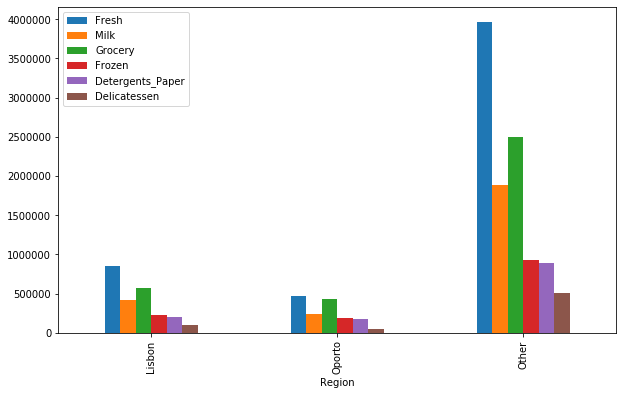

In [86]:
plt.rcParams['figure.figsize']= (10,6)
data.groupby('Region').sum().plot.bar();

In [87]:
data['total'] = data['Fresh'] + data['Milk'] + data['Grocery'] + data['Frozen'] + data['Detergents_Paper'] + data['Delicatessen']

In [88]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,total
0,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,Retail,Other,22615,5410,7198,3915,1777,5185,46100


1.3. On the basis of the descriptive measure of variability, which item shows the most inconsistent behaviour?
Which items shows the least inconsistent behaviour?

In [89]:
data.std().sort_values()

Delicatessen         2820.105937
Detergents_Paper     4767.854448
Frozen               4854.673333
Milk                 7380.377175
Grocery              9503.162829
Fresh               12647.328865
total               26356.301730
dtype: float64

In [90]:
data.mean().sort_values()

Delicatessen         1524.870455
Detergents_Paper     2881.493182
Frozen               3071.931818
Milk                 5796.265909
Grocery              7951.277273
Fresh               12000.297727
total               33226.136364
dtype: float64

In [91]:
Var = (data.std().sort_values() / data.mean().sort_values())
Var

Delicatessen        1.849407
Detergents_Paper    1.654647
Frozen              1.580332
Milk                1.273299
Grocery             1.195174
Fresh               1.053918
total               0.793240
dtype: float64

In [92]:
Incostintent = Var['Delicatessen'] 
print('On the basis of variance and standard deviation, Delicatessen shows the most incostitent beahaviour, Co-eff of Variance = ', Incostintent)

On the basis of variance and standard deviation, Delicatessen shows the most incostitent beahaviour, Co-eff of Variance =  1.8494068981158382


In [93]:
Consistent = Var['Fresh']
print('On the basis of variance and standard deviation, Fresh shows the least incostitant beahaviour, Co-eff of Variance = ', Consistent)

On the basis of variance and standard deviation, Fresh shows the least incostitant beahaviour, Co-eff of Variance =  1.0539179237473149


1.4. Are there any outliers in the data?

In [94]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,total
0,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,Retail,Other,22615,5410,7198,3915,1777,5185,46100


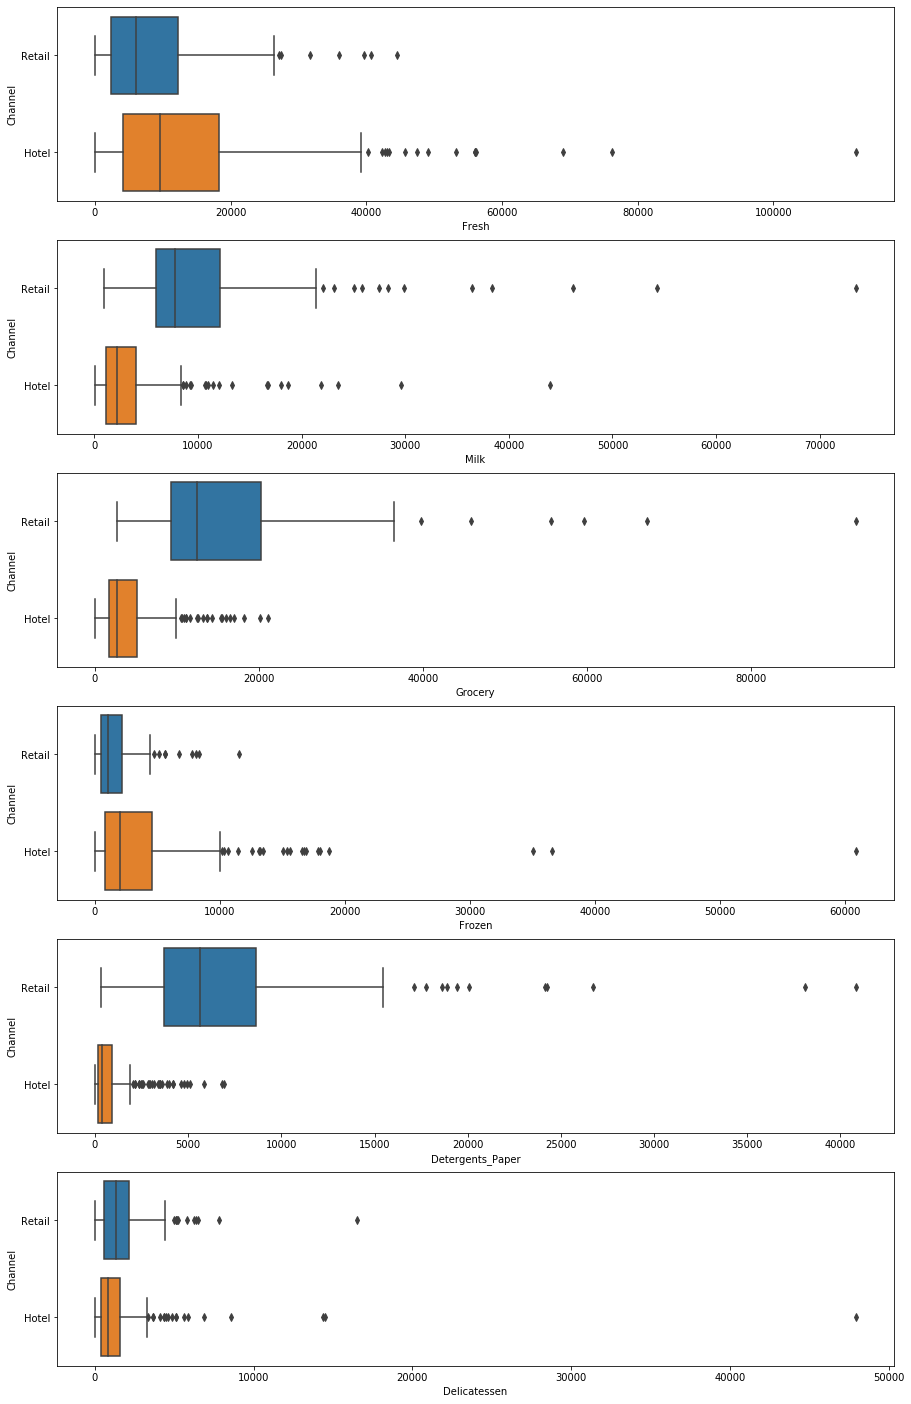

In [95]:
fig, axes = plt.subplots (6,1, figsize=(15,25))
sns.boxplot(x = 'Fresh', y = 'Channel', data=data, ax = axes [0])
sns.boxplot(x = 'Milk', y = 'Channel', data=data, ax = axes [1])
sns.boxplot(x = 'Grocery', y = 'Channel', data=data, ax = axes [2])
sns.boxplot(x = 'Frozen', y = 'Channel', data=data, ax = axes [3])
sns.boxplot(x = 'Detergents_Paper', y = 'Channel', data=data, ax = axes [4])
sns.boxplot(x = 'Delicatessen', y = 'Channel', data=data, ax = axes [5])

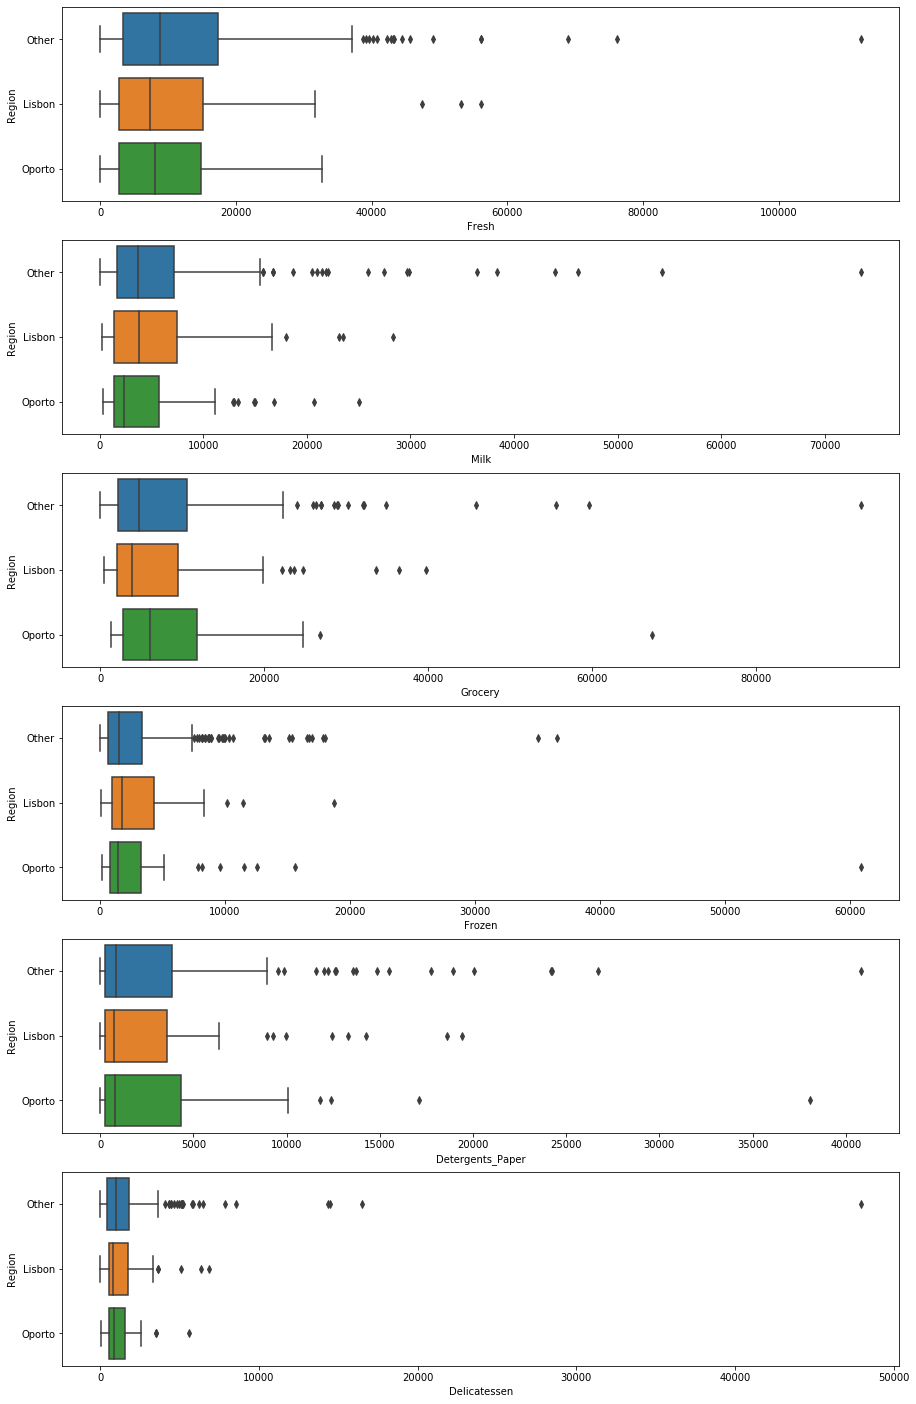

In [96]:
fig, axes = plt.subplots (6,1, figsize=(15,25))
sns.boxplot(x = 'Fresh', y = 'Region', data=data, ax = axes [0])
sns.boxplot(x = 'Milk', y = 'Region', data=data, ax = axes [1])
sns.boxplot(x = 'Grocery', y = 'Region', data=data, ax = axes [2])
sns.boxplot(x = 'Frozen', y = 'Region', data=data, ax = axes [3])
sns.boxplot(x = 'Detergents_Paper', y = 'Region', data=data, ax = axes [4])
sns.boxplot(x = 'Delicatessen', y = 'Region', data=data, ax = axes [5])

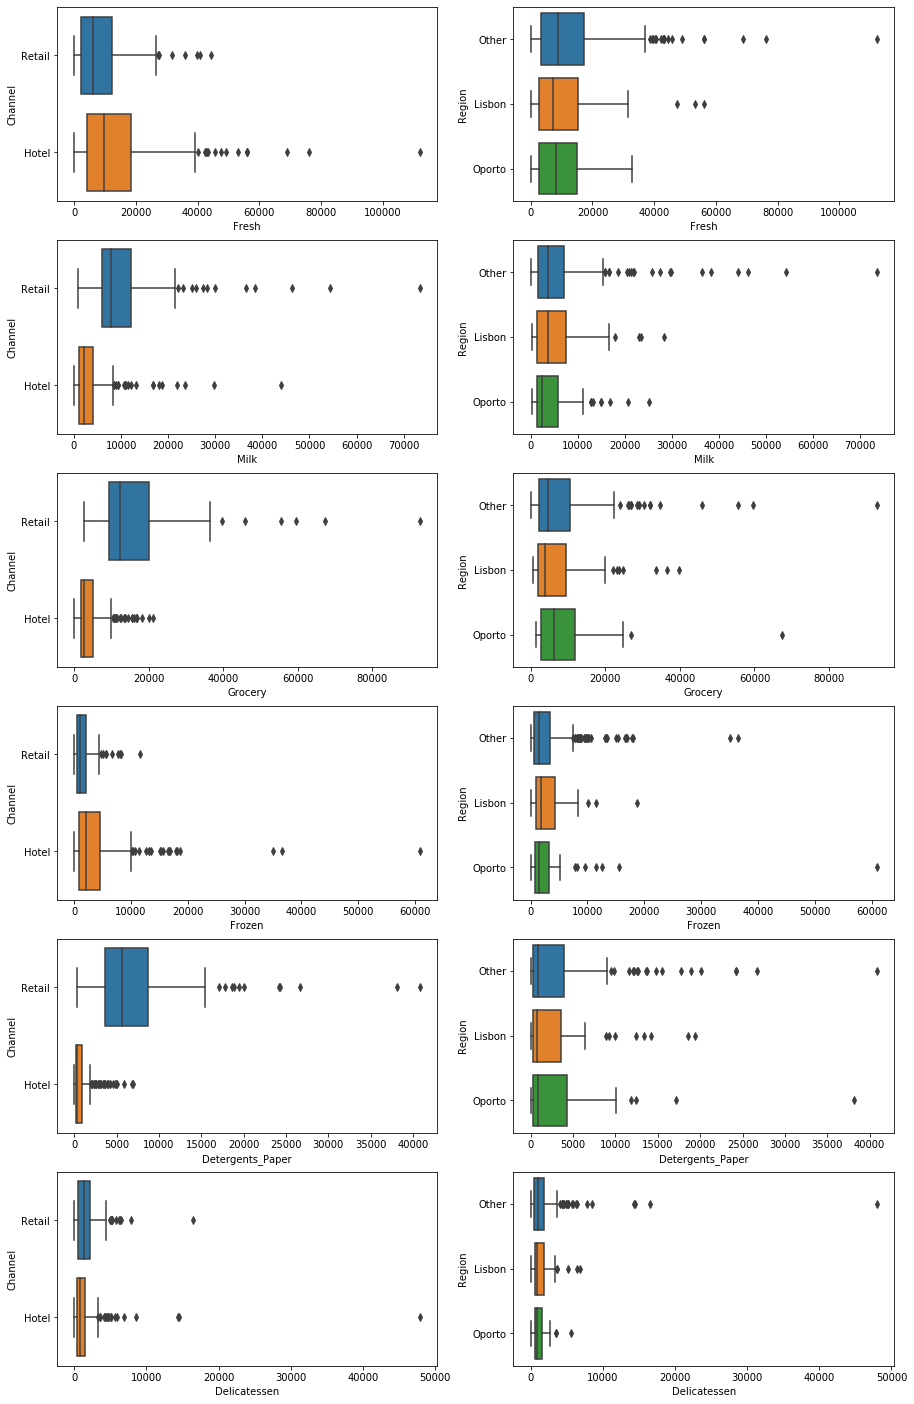

In [97]:
fig, axes = plt.subplots (6,2, figsize=(15,25))
sns.boxplot(x = 'Fresh', y = 'Channel', data=data, ax = axes [0][0])
sns.boxplot(x = 'Milk', y = 'Channel', data=data, ax = axes [1][0])
sns.boxplot(x = 'Grocery', y = 'Channel', data=data, ax = axes [2][0])
sns.boxplot(x = 'Frozen', y = 'Channel', data=data, ax = axes [3][0])
sns.boxplot(x = 'Detergents_Paper', y = 'Channel', data=data, ax = axes [4][0])
sns.boxplot(x = 'Delicatessen', y = 'Channel', data=data, ax = axes [5][0])
sns.boxplot(x = 'Fresh', y = 'Region', data=data, ax = axes [0][1])
sns.boxplot(x = 'Milk', y = 'Region', data=data, ax = axes [1][1])
sns.boxplot(x = 'Grocery', y = 'Region', data=data, ax = axes [2][1])
sns.boxplot(x = 'Frozen', y = 'Region', data=data, ax = axes [3][1])
sns.boxplot(x = 'Detergents_Paper', y = 'Region', data=data, ax = axes [4][1])
sns.boxplot(x = 'Delicatessen', y = 'Region', data=data, ax = axes [5][1]);

In [98]:
#Based on the above boxplota we can say each variable has outliers excluding the Product Fresh in Oporto region

2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

2.1.1. Gender and Major
2.1.2. Gender and Grad Intention
2.1.3. Gender and Employment
2.1.4. Gender and Computer

In [99]:
srv = pd.read_csv('Survey-1.csv')

In [100]:
srv.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [101]:
C_M = pd.crosstab(srv['Gender'],srv['Major'])
C_M

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [102]:
C_G = pd.crosstab(srv['Gender'],srv['Grad Intention'])
C_G

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [103]:
C_E = pd.crosstab(srv['Gender'],srv['Employment'])
C_E

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [104]:
C_C = pd.crosstab(srv['Gender'],srv['Computer'],margins=True,margins_name='Total')
C_C

Computer,Desktop,Laptop,Tablet,Total
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
Total,5,55,2,62


2.2. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following questions:

2.2.1. What is the probability that a randomly selected CMSU student will be male?
What is the probability that a randomly selected CMSU student will be female?

In [105]:
srv.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [106]:
srv['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [107]:
srv['Gender'].count()

62

In [108]:
P_M = srv['Gender'].value_counts()['Male'] / srv['Gender'].count()
P_M
print('Probability that a randomly selected CMSU student will be male is',P_M)

Probability that a randomly selected CMSU student will be male is 0.46774193548387094


In [109]:
P_F = srv['Gender'].value_counts()['Female'] / srv['Gender'].count()
P_F
print('Probability that a randomly selected CMSU student will be Female is',P_F)

Probability that a randomly selected CMSU student will be Female is 0.532258064516129


In [110]:
#alternate
srv['Gender'].value_counts(normalize=True)

Female    0.532258
Male      0.467742
Name: Gender, dtype: float64

2.2.2. Find the conditional probability of different majors among the male students in CMSU.
Find the conditional probability of different majors among the female students of CMSU.

In [111]:
C_M

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [112]:
C_M['Accounting']

Gender
Female    3
Male      4
Name: Accounting, dtype: int64

In [113]:
srv['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [114]:
PM_AM = C_M['Accounting']['Male'] / srv['Gender'].value_counts()['Male']
PM_AF = C_M['Accounting']['Female'] / srv['Gender'].value_counts()['Female']
PM_AM
PM_AF
print('conditional probability of Accounting among the Male students is',PM_AM)
print('conditional probability of Accounting among the Female students is',PM_AF)

conditional probability of Accounting among the Male students is 0.13793103448275862
conditional probability of Accounting among the Female students is 0.09090909090909091


In [115]:
PM_CISM = C_M['CIS']['Male'] / srv['Gender'].value_counts()['Male']
PM_CISF = C_M['CIS']['Female'] / srv['Gender'].value_counts()['Female']
PM_CISM
PM_CISF
print('conditional probability of CIS among the Male students is',PM_CISM)
print('conditional probability of CIS among the Female students is',PM_CISF)

conditional probability of CIS among the Male students is 0.034482758620689655
conditional probability of CIS among the Female students is 0.09090909090909091


In [116]:
PM_EFM = C_M['Economics/Finance']['Male'] / srv['Gender'].value_counts()['Male']
PM_EFF = C_M['Economics/Finance']['Female'] / srv['Gender'].value_counts()['Female']
PM_EFM
PM_EFF
print('conditional probability of Economics/Finance in Major among the Male students is',PM_EFM)
print('conditional probability of Economics/Finance in Major among the Female students is',PM_EFF)

conditional probability of Economics/Finance in Major among the Male students is 0.13793103448275862
conditional probability of Economics/Finance in Major among the Female students is 0.21212121212121213


In [117]:
PM_IBM = C_M['International Business']['Male'] / srv['Gender'].value_counts()['Male']
PM_IBF = C_M['International Business']['Female'] / srv['Gender'].value_counts()['Female']
PM_IBM
PM_IBF
print('conditional probability of International Business in Major among the Male students is',PM_IBM)
print('conditional probability of International Business in Major among the Female students is',PM_IBF)

conditional probability of International Business in Major among the Male students is 0.06896551724137931
conditional probability of International Business in Major among the Female students is 0.12121212121212122


In [118]:
PM_MM = C_M['Management']['Male'] / srv['Gender'].value_counts()['Male']
PM_MF = C_M['Management']['Female'] / srv['Gender'].value_counts()['Female']
PM_MM
PM_MF
print('conditional probability of Management in Major among the Male students is',PM_MM)
print('conditional probability of Management in Major among the Female students is',PM_MF)

conditional probability of Management in Major among the Male students is 0.20689655172413793
conditional probability of Management in Major among the Female students is 0.12121212121212122


In [119]:
PM_OM = C_M['Other']['Male'] / srv['Gender'].value_counts()['Male']
PM_OF = C_M['Other']['Female'] / srv['Gender'].value_counts()['Female']
PM_OM
PM_OF
print('conditional probability of Other in Major among the Male students is',PM_OM)
print('conditional probability of Other in Major among the Female students is',PM_OF)

conditional probability of Other in Major among the Male students is 0.13793103448275862
conditional probability of Other in Major among the Female students is 0.09090909090909091


In [120]:
PM_RMM = C_M['Retailing/Marketing']['Male'] / srv['Gender'].value_counts()['Male']
PM_RMF = C_M['Retailing/Marketing']['Female'] / srv['Gender'].value_counts()['Female']
PM_RMM
PM_RMF
print('conditional probability of Retailing/Marketing in Major among the Male students is',PM_RMM)
print('conditional probability of Retailing/Marketing in Major among the Female students is',PM_RMF)

conditional probability of Retailing/Marketing in Major among the Male students is 0.1724137931034483
conditional probability of Retailing/Marketing in Major among the Female students is 0.2727272727272727


In [121]:
PM_UM = C_M['Undecided']['Male'] / srv['Gender'].value_counts()['Male']
PM_UF = C_M['Undecided']['Female'] / srv['Gender'].value_counts()['Female']
PM_UM
PM_UF
print('conditional probability of Retailing/Marketing in Major among the Male students is',PM_RMM)
print('conditional probability of Retailing/Marketing in Major among the Female students is',PM_RMF)

conditional probability of Retailing/Marketing in Major among the Male students is 0.1724137931034483
conditional probability of Retailing/Marketing in Major among the Female students is 0.2727272727272727


In [122]:
PM_UM = C_M['Undecided']['Male'] / srv['Gender'].value_counts()['Male']
PM_UF = C_M['Undecided']['Female'] / srv['Gender'].value_counts()['Female']
PM_UM
PM_UF
print('conditional probability of Retailing/Marketing in Major among the Male students is',PM_UM)
print('conditional probability of Retailing/Marketing in Major among the Female students is',PM_UF)

conditional probability of Retailing/Marketing in Major among the Male students is 0.10344827586206896
conditional probability of Retailing/Marketing in Major among the Female students is 0.0


In [123]:
C_M

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [124]:
PM_AM + PM_CISM + PM_EFM + PM_IBM + PM_MM + PM_OM + PM_RMM + PM_UM

0.9999999999999999

In [125]:
PM_AF + PM_CISF + PM_EFF + PM_IBF + PM_MF + PM_OF + PM_RMF + PM_UF

1.0

2.2.3. Find the conditional probability of intent to graduate, given that the student is a male.
Find the conditional probability of intent to graduate, given that the student is a female.

In [126]:
C_G

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [127]:
C_G['Yes']

Gender
Female    11
Male      17
Name: Yes, dtype: int64

In [128]:
srv['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [129]:
PGI_M = C_G['Yes']['Male'] / srv['Gender'].value_counts()['Male']
PGI_F = C_G['Yes']['Female'] / srv['Gender'].value_counts()['Female']
PGI_M
PGI_F
print('conditional probability of intent to graduate, given that the student is a male is',PGI_M)
print('conditional probability of intent to graduate, given that the student is a male is',PGI_F)

conditional probability of intent to graduate, given that the student is a male is 0.5862068965517241
conditional probability of intent to graduate, given that the student is a male is 0.3333333333333333


2.2.4. Find the conditional probability of employment status for the male students as well as for the female students.

In [130]:
C_E

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [131]:
C_E['Full-Time']

Gender
Female    3
Male      7
Name: Full-Time, dtype: int64

In [132]:
srv['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [133]:
PFT_M = C_E['Full-Time']['Male'] / srv['Gender'].value_counts()['Male']
PFT_F = C_E['Full-Time']['Female'] / srv['Gender'].value_counts()['Female']
PPT_M = C_E['Part-Time']['Male'] / srv['Gender'].value_counts()['Male']
PPT_F = C_E['Part-Time']['Female'] / srv['Gender'].value_counts()['Female']
PU_M = C_E['Unemployed']['Male'] / srv['Gender'].value_counts()['Male']
PU_F = C_E['Unemployed']['Female'] / srv['Gender'].value_counts()['Female']
print('conditional probability of employment status, Full-Time for the male students is', PFT_M)
print('conditional probability of employment status, Full-Time for the feale students is', PFT_F)
print('conditional probability of employment status, Part-Time for the male students is', PPT_M)
print('conditional probability of employment status, Part-Time for the female students is', PPT_F)
print('conditional probability of employment status, Unemployed for the male students is', PU_M)
print('conditional probability of employment status, Unemployed for the female students is', PU_F)

conditional probability of employment status, Full-Time for the male students is 0.2413793103448276
conditional probability of employment status, Full-Time for the feale students is 0.09090909090909091
conditional probability of employment status, Part-Time for the male students is 0.6551724137931034
conditional probability of employment status, Part-Time for the female students is 0.7272727272727273
conditional probability of employment status, Unemployed for the male students is 0.10344827586206896
conditional probability of employment status, Unemployed for the female students is 0.18181818181818182


In [134]:
PFT_M + PPT_M + PU_M

1.0

In [135]:
PFT_F + PPT_F + PU_F

1.0

2.2.5. Find the conditional probability of laptop preference among the male students as well as among the female students.

In [136]:
C_C

Computer,Desktop,Laptop,Tablet,Total
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
Total,5,55,2,62


In [137]:
C_C['Laptop']

Gender
Female    29
Male      26
Total     55
Name: Laptop, dtype: int64

In [138]:
PC_LM = C_C['Laptop']['Male'] / srv['Gender'].value_counts()['Male']
PC_LF = C_C['Laptop']['Female'] / srv['Gender'].value_counts()['Female']
print('conditional probability of laptop preference among the male students is',PC_LM)
print('conditional probability of laptop preference among the female students is',PC_LF)

conditional probability of laptop preference among the male students is 0.896551724137931
conditional probability of laptop preference among the female students is 0.8787878787878788


2.3. Based on the above probabilities, do you think that the column variable in each case is independent of Gender?
Justify your comment in each case.

In [139]:
# H0 = variables are independent
# H1 = variables are not independent

In [140]:
PM = chi2_contingency(C_M)
PM

(7.084844866036089,
 0.42009968345511806,
 7,
 array([[3.72580645, 2.12903226, 5.85483871, 3.19354839, 5.32258065,
         3.72580645, 7.4516129 , 1.59677419],
        [3.27419355, 1.87096774, 5.14516129, 2.80645161, 4.67741935,
         3.27419355, 6.5483871 , 1.40322581]]))

In [141]:
PG = chi2_contingency(C_G)
PG

(4.774796781066374,
 0.09186837889149435,
 2,
 array([[ 6.38709677, 11.70967742, 14.90322581],
        [ 5.61290323, 10.29032258, 13.09677419]]))

In [142]:
PE = chi2_contingency(C_E)
PE

(2.9355495613715337,
 0.2304376894892966,
 2,
 array([[ 5.32258065, 22.88709677,  4.79032258],
        [ 4.67741935, 20.11290323,  4.20967742]]))

In [143]:
PC = chi2_contingency(C_C)
PC

(2.114372565783224,
 0.9088848182816986,
 6,
 array([[ 2.66129032, 29.27419355,  1.06451613, 33.        ],
        [ 2.33870968, 25.72580645,  0.93548387, 29.        ],
        [ 5.        , 55.        ,  2.        , 62.        ]]))

In [144]:
print('Resultant P value of all the above probalities obtained by Chi2 test is greater than 0.05. Hence, null hypothesis is true which states that variables are independent of Gender ');

Resultant P value of all the above probalities obtained by Chi2 test is greater than 0.05. Hence, null hypothesis is true which states that variables are independent of Gender 


2.4. Note that there are three numerical (continuous) variables in the data set, Salary, Spending and Text Messages. For each of them comment whether they follow a normal distribution.
Write a note summarizing your conclusions.
[Recall that symmetric histogram does not necessarily mean that the underlying distribution is symmetric]

In [145]:
srv.head()[['Salary', 'Spending', 'Text Messages']]

,Salary,Spending,Text Messages
0,50.0,350,200
1,25.0,360,50
2,45.0,600,200
3,40.0,600,250
4,40.0,500,100


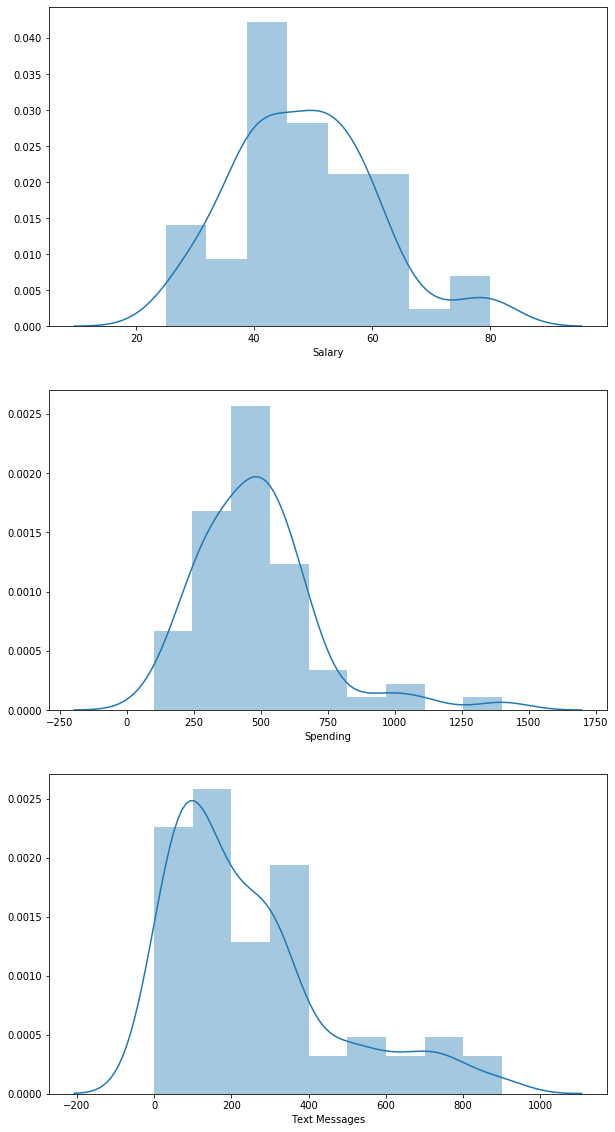

In [146]:
fig, axes = plt.subplots (3, figsize=(10,20))
sns.distplot(srv['Salary'], ax = axes[0])
sns.distplot(srv['Spending'], ax = axes[1])
sns.distplot(srv['Text Messages'], ax = axes[2])

In [147]:
shapiro(srv['Salary'])

(0.9565856456756592, 0.028000956401228905)

In [148]:
shapiro(srv['Spending'])

(0.8777452111244202, 1.6854661225806922e-05)

In [149]:
shapiro(srv['Text Messages'])

(0.8594191074371338, 4.324040673964191e-06)

In [150]:
kurtosis(srv['Salary'])

0.29557460496091226

In [151]:
kurtosis(srv['Spending'])

4.105151459796207

In [152]:
kurtosis(srv['Text Messages'])

0.9509044062918806

In [153]:
#Conclusion as P value for all the variables is less than 0.05, it can be said that data does not follow normal distribution.

Problem 3

An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and colouring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet is calculated. The company claims that the mean moisture content cannot be greater than 0.35 pound per 100 square feet.
The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.


For the A shingles, the null and alternative hypothesis to test whether the population mean moisture content is less than 0.35 pound per 100 square feet  is given:

LaTeX: H_0H0<=0.35

LaTeX: H_AHA>0.35

For the B shingles, the null and alternative hypothesis to test whether the population mean moisture content is less than 0.35 pound per 100 square feet is given:

LaTeX: H_0H0<=0.35

LaTeX: H_AHA>0.35

3.1 Do you think that the population means for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

In [155]:
Shingles = pd.read_csv('A & B shingles-1.csv')

In [156]:
Shingles.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [157]:
Shingles.isnull()

,A,B
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [159]:
Shingles['B'].dropna(inplace=True)

In [160]:
B = Shingles['B']
B

0     0.14
1     0.15
2     0.31
3     0.16
4     0.37
5     0.18
6     0.42
7     0.58
8     0.25
9     0.41
10    0.17
11    0.13
12    0.23
13    0.11
14    0.10
15    0.19
16    0.22
17    0.44
18    0.11
19    0.11
20    0.31
21    0.43
22    0.26
23    0.18
24    0.44
25    0.43
26    0.16
27    0.52
28    0.36
29    0.22
30    0.39
Name: B, dtype: float64

In [161]:
A = Shingles['A']

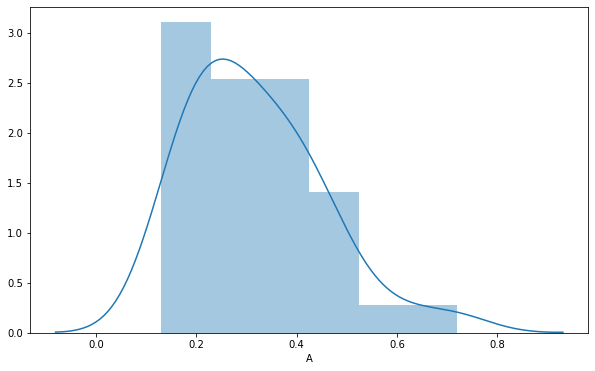

In [162]:
sns.distplot(A)

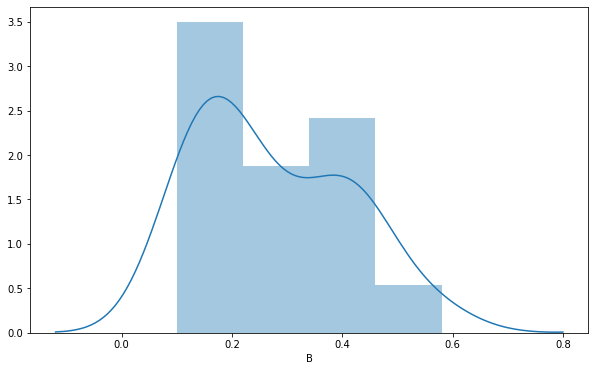

In [163]:
sns.distplot(B)

In [164]:
A.mean()

0.3166666666666666

In [165]:
B.mean()

0.2735483870967742

In [166]:
Shingles.describe()

,A,B
count,36.000000,31.000000
mean,0.316667,0.273548
std,0.135731,0.137296
min,0.130000,0.100000
25%,0.207500,0.160000
50%,0.290000,0.230000
75%,0.392500,0.400000
max,0.720000,0.580000


In [ ]:
#Test for normality

In [167]:
shapiro(A)

(0.9375598430633545, 0.042670514434576035)

In [168]:
shapiro(B)

(0.9172994494438171, 0.02002784051001072)

In [ ]:
# P value for both variables is less than 0.05. Hence, we reject the null hypothesis,
#and conclude that data is not normal fot both the varibles

In [ ]:
#Test for Variance

In [169]:
levene (A, B)

LeveneResult(statistic=0.23808965111555147, pvalue=0.6272312061867605)

In [ ]:
# P value for both variables is higher than 0.05. Hence, we fail reject the null hypothesis,
#and conclude both data sets have equal variance 
#as the data sets have equal variance we can perform parametric test

In [170]:
ttest_ind(A, B)

Ttest_indResult(statistic=1.289628271966112, pvalue=0.2017496571835328)

#3.2 mean are equal, normally distributed, equal variance, Unpaired, Nonprametric
#Assumptions:
1> Mean of sample A and sample B are equal
2> Sample A and B is normally distributed
3> Variance of both samples are equal
4> Since the sample are not paired and as per shapiro test we know that the distribution is not normal. We go ahead with non-parametric test for un-paired sample i.e mannwhitneyu